# Supervised Learning In-Depth: Random Forests
 

In [1]:
#This one is a non-parametric algorithm called Random Forests
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

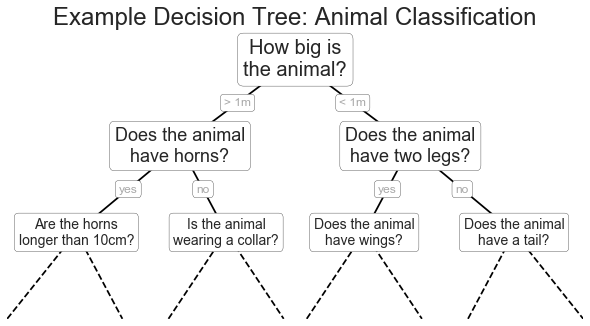

In [2]:
#Random forests are an example of an ensemble learner built on decision trees
import fig_code
fig_code.plot_example_decision_tree()

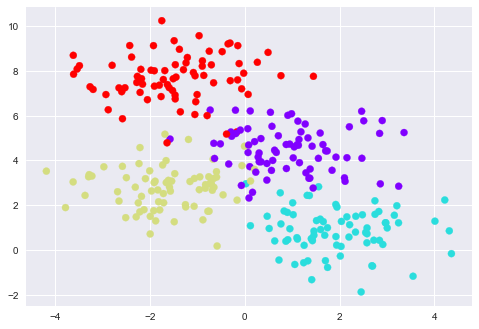

In [45]:
#create data
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

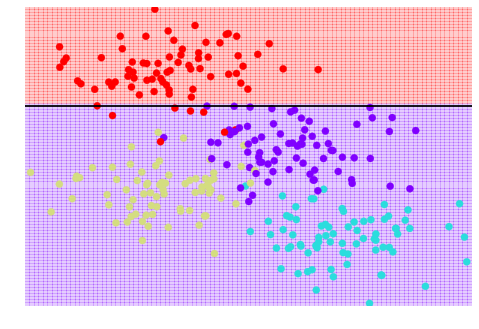

In [5]:
from fig_code import visualize_tree, plot_tree_interactive
plot_tree_interactive(X, y);

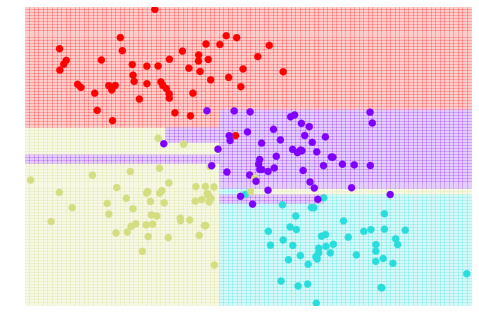

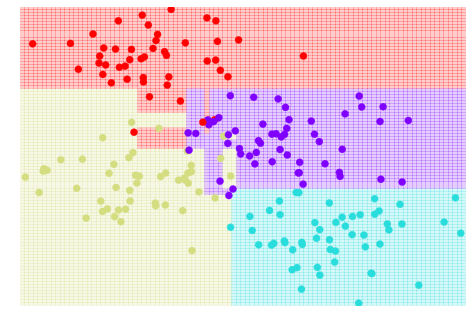

In [7]:
#it is very easy to create trees which over-fit the data
#they are flexible enough that they can learn the structure of the noise in the data rather than the signal
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

plt.figure()
visualize_tree(clf, X[:200], y[:200], boundaries=False)
plt.figure()
visualize_tree(clf, X[-200:], y[-200:], boundaries=False)
#以下兩圖是同一個data中的dataset，從下圖可以看出雖然是不同資料，但決策樹卻會過度分類(兩個分類結果的一些細節不一樣)


# Ensembles of Estimators: Random Forests

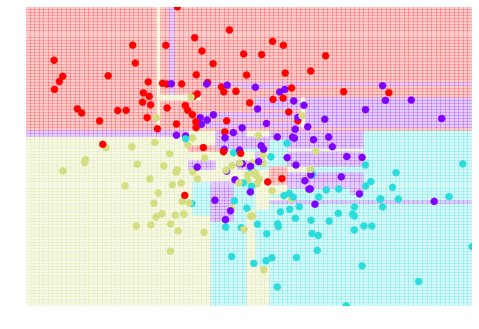

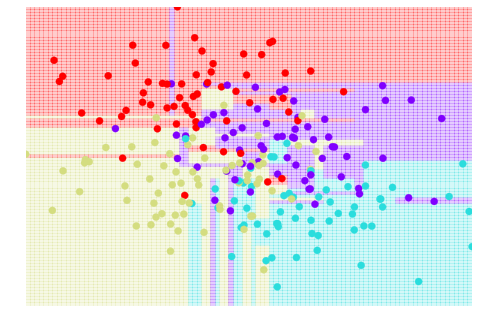

In [8]:
def fit_randomized_tree(random_state=0):
    X, y = make_blobs(n_samples=300, centers=4,
                      random_state=0, cluster_std=2.0)
    clf = DecisionTreeClassifier(max_depth=15)
    
    rng = np.random.RandomState(random_state)
    i = np.arange(len(y))
    rng.shuffle(i)
    visualize_tree(clf, X[i[:250]], y[i[:250]], boundaries=False,
                   xlim=(X[:, 0].min(), X[:, 0].max()),
                   ylim=(X[:, 1].min(), X[:, 1].max()))
    
from IPython.html.widgets import interact
interact(fit_randomized_tree, random_state=[0, 100]);

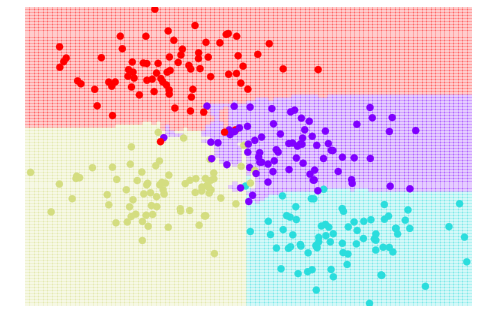

In [46]:
#隨機森林會去把多個desicion tree的model做一個平均取得更好的效果
from sklearn.ensemble import RandomForestClassifier
#n_estimators代表要取幾個CART tree來做平均，每個CART tree的資料集都會有些差異，讓random forest，能夠把每個tree比較弱的分類器做修正
clf = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_tree(clf, X, y, boundaries=False);

# random forest for regression

[ 8.4908098   9.82680145  7.95583469  9.02324631  5.43095602  0.70882484
  4.50727941  9.922223    5.09542091  5.66513613  3.69658036  5.23366451
  6.22167427  0.61312121  1.42293959  8.70336492  3.32005076  4.90379983
  7.64317208  5.9780789   8.76010672  0.0238564   0.64833705  3.90711962
  5.42132129  4.47457905  4.77870718  3.78926208  6.66554963  3.11494081
  6.07204179  3.75711646  5.46547338  9.28627069  3.96564499  9.18546271
  8.12349534  3.18456655  4.49059468  3.84854491  8.7612132   6.88421575
  3.10436705  3.25482891  4.34873879  8.1607217   5.70184353  7.16467651
  5.07708922  9.02965892  2.37104366  5.32948955  4.10850971  2.10921331
  1.01887763  4.4978829   5.86229527  2.49609833  0.98397301  6.07813213
  6.86502674  7.09575755  0.48023085  1.98414526  7.44801738  2.81122539
  3.04564975  9.94903052  4.38744633  5.92707719  2.01010588  7.53043574
  2.57386292  2.05758866  5.62602039  7.06759187  1.16675448  6.15325586
  5.81883543  2.25192378  5.93506563  5.94487126  0

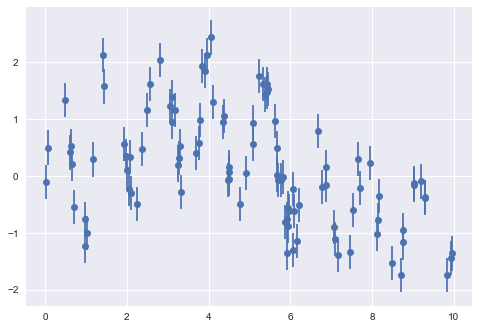

In [14]:
#continuous rather than categorical variables
from sklearn.ensemble import RandomForestRegressor
#create data
x = 10 * np.random.rand(100)
print(x)
def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * np.random.randn(len(x))

    return slow_oscillation + fast_oscillation + noise

y = model(x)
plt.errorbar(x, y, 0.3, fmt='o');

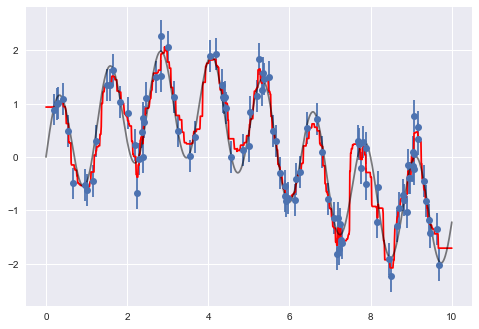

In [13]:
xfit = np.linspace(0, 10, 1000)
yfit = RandomForestRegressor(100).fit(x[:, None], y).predict(xfit[:, None])
ytrue = model(xfit, 0)

plt.errorbar(x, y, 0.3, fmt='o')
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);

In [15]:
#Example: Random Forest for Classifying Digits
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [16]:
X = digits.data
y = digits.target
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


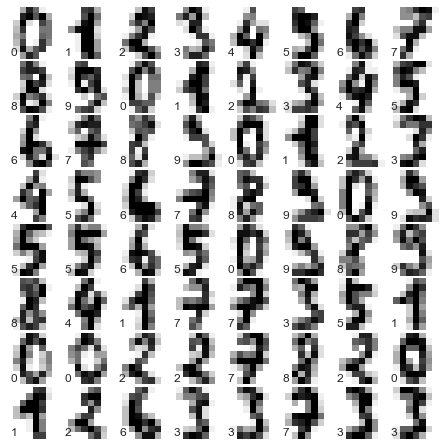

In [17]:
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary)
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

[0.20342331122105023, 0.31397014932449885, 0.46896536985081677, 0.61463321358724199, 0.69746418857607773, 0.77856924706168185, 0.82164552694403437, 0.832009639374645, 0.84691370463767046, 0.84536938078776946, 0.85507731121652364, 0.85206396246527394, 0.85419628171856732, 0.84765274650943567, 0.84098684116222278, 0.85077578012582611, 0.84542998741451547, 0.84764354500120742, 0.84903410229428877]


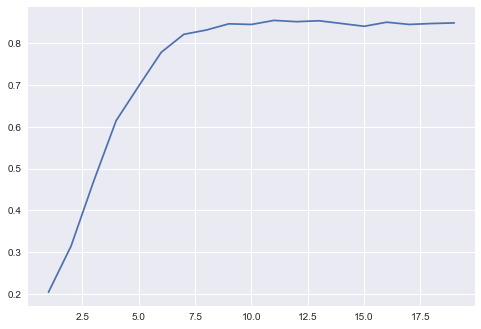

In [31]:
from sklearn.model_selection  import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)
dtc_score = []
#從中可發現一開始max_depth提昇會提找準確率，但到一定程度反而會下降
for i in range(1,20):
    clf = DecisionTreeClassifier(max_depth=i)
    score = cross_val_score(clf,Xtrain,ytrain, cv=10)
    dtc_score.append(score.mean())
print(dtc_score)
plt.plot(list(range(1,20)),dtc_score)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=11,
            max_features=8, max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
0.775555555556


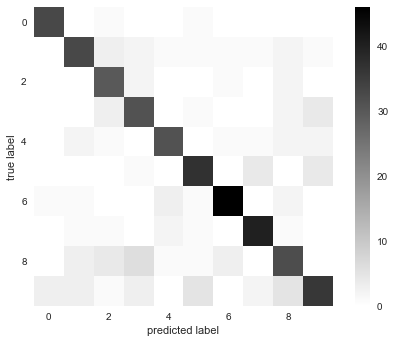

In [42]:
clf = DecisionTreeClassifier(max_depth=11,max_features=8)
print(clf)
#max_features也是越大，準確率越高，過高會降低
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)
print(metrics.accuracy_score(ypred, ytest))
plt.imshow(metrics.confusion_matrix(ypred, ytest),
           interpolation='nearest', cmap=plt.cm.binary)
plt.grid(False)
plt.colorbar()
plt.xlabel("predicted label")
plt.ylabel("true label");

# Dimensionality Reduction: Principal Component Analysis in-depth

In [47]:
from __future__ import print_function, division

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting style defaults
import seaborn as sns; sns.set()

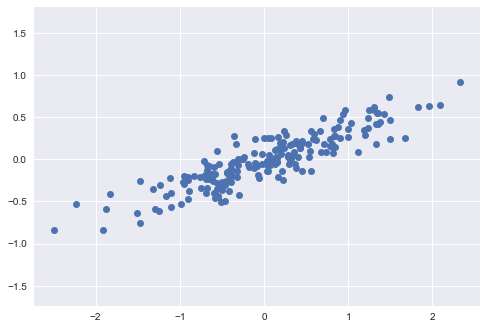

In [49]:
#Principal Component Analysis is a very powerful unsupervised method for dimensionality reduction in data
np.random.seed(1)
X = np.dot(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T
plt.plot(X[:, 0], X[:, 1], 'o')
plt.axis('equal');

In [50]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_)
print(pca.components_)

[ 0.75871884  0.01838551]
[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


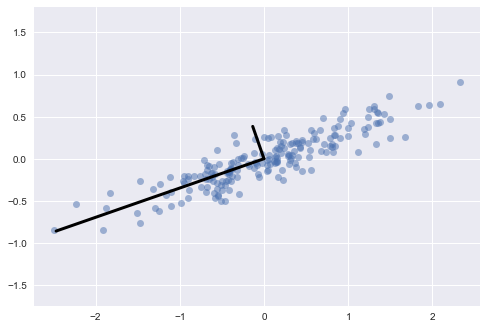

In [53]:
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.5)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)
plt.axis('equal');

#代表其中一個特徵值比較重要，另外一個幾乎可以忽略

In [52]:
#這邊保留95%的變異，可以看到降維後，只剩一個變數
clf = PCA(0.95) # keep 95% of variance
X_trans = clf.fit_transform(X)
print(X.shape)
print(X_trans.shape)

(200, 2)
(200, 1)


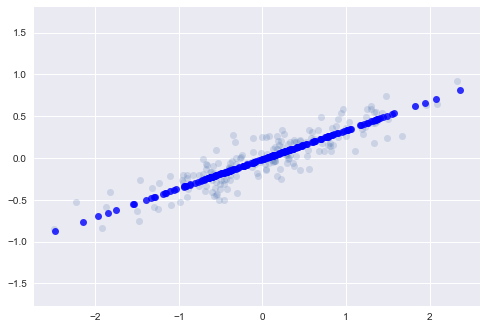

In [54]:
#降維後這個變數畫出來的樣子，幾乎可以預測原先的那些數據了!
X_new = clf.inverse_transform(X_trans)
#alpha是透明度
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.2)
plt.plot(X_new[:, 0], X_new[:, 1], 'ob', alpha=0.8)
plt.axis('equal');

# Application of PCA to Digits

In [56]:
#在有高度線性相關的變數，用主成份去做分析會比用原來的變數做分析來得恰當
#剛二維的資料降為可能較沒感覺，現在使用多維資料來測試
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


In [57]:
#一個圖片從64維降到2維
pca = PCA(2)  # project from 64 to 2 dimensions
Xproj = pca.fit_transform(X)
print(X.shape)
print(Xproj.shape)

(1797, 64)
(1797, 2)


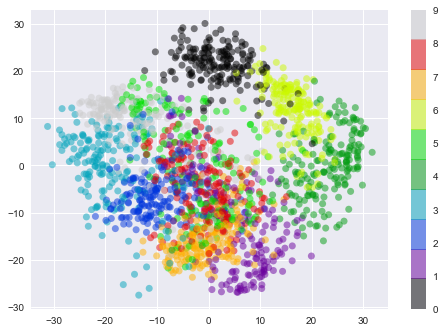

In [58]:
plt.scatter(Xproj[:, 0], Xproj[:, 1], c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar();

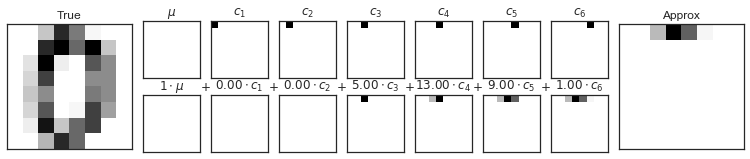

In [59]:
from fig_code.figures import plot_image_components

sns.set_style('white')
plot_image_components(digits.data[0])

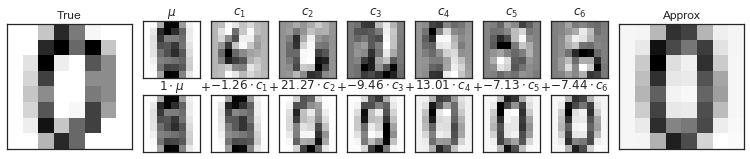

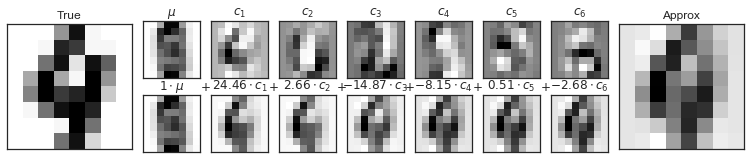

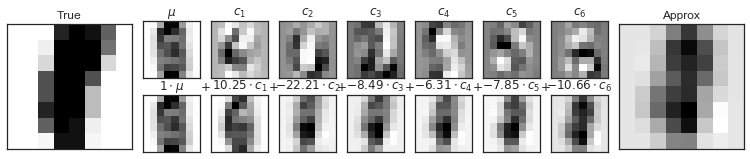

In [60]:
from fig_code.figures import plot_pca_interactive
plot_pca_interactive(digits.data)

[ 0.14890594  0.28509365  0.40303959  0.48713938  0.54496353  0.59413263
  0.6372925   0.67390623  0.70743871  0.73822677  0.76195018  0.78467714
  0.80289578  0.82063433  0.83530534  0.84940249  0.86258838  0.87506976
  0.88524694  0.89430312  0.9031985   0.91116973  0.91884467  0.9260737
  0.93303259  0.9389934   0.94474955  0.94990113  0.95479652  0.9590854
  0.96282146  0.96635421  0.96972105  0.97300135  0.97608455  0.97902234
  0.98158823  0.98386565  0.98608843  0.98820273  0.99010182  0.99168835
  0.99319995  0.99460574  0.99577196  0.99684689  0.99781094  0.99858557
  0.99914278  0.99954711  0.99975703  0.99983951  0.99989203  0.99994255
  0.99997555  0.99998798  0.99999503  0.99999804  0.99999911  0.99999966
  1.          1.          1.          1.        ]


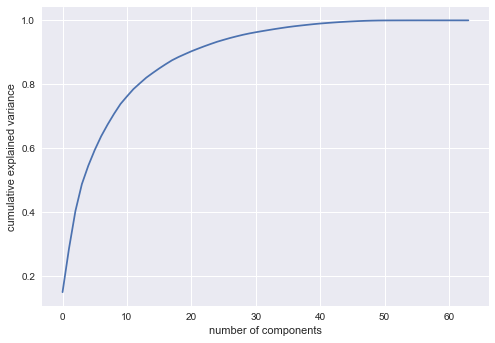

In [64]:
sns.set()
pca = PCA().fit(X)
#此處可以看到image的64個特徵值，每多一個特徵值variance增加的量，從下圖可以看出大概維持20個特徵值，variance還有90%，
#越後面特徵值越多，但也沒有太大的差異，不利於分析

print(np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

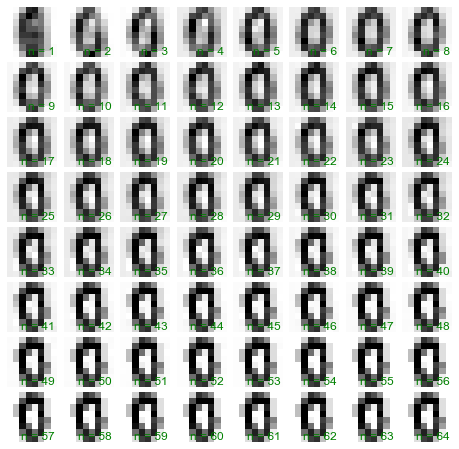

In [65]:
#這邊可以看到pca從1~64維所呈現的圖，可以發現後面越多維所能辨識的圖形差不多
fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    pca = PCA(i + 1).fit(X)
    im = pca.inverse_transform(pca.transform(X[20:21]))

    ax.imshow(im.reshape((8, 8)), cmap='binary')
    ax.text(0.95, 0.05, 'n = {0}'.format(i + 1), ha='right',
            transform=ax.transAxes, color='green')
    ax.set_xticks([])
    ax.set_yticks([])

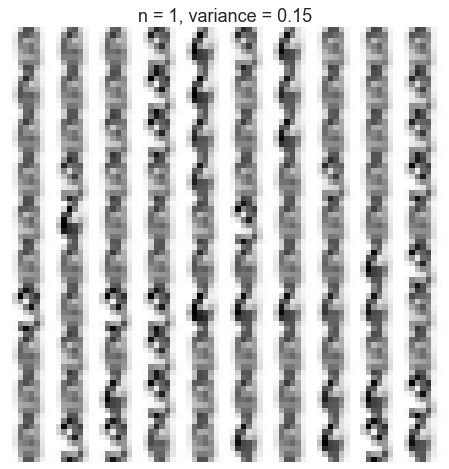

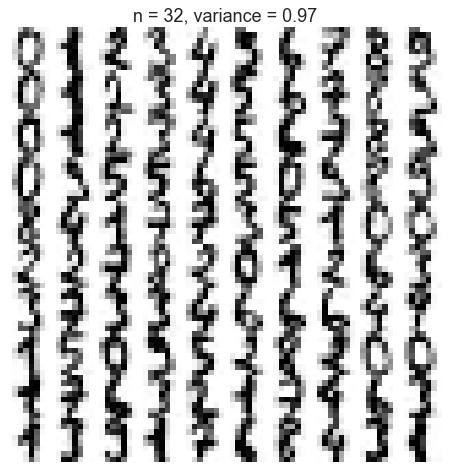

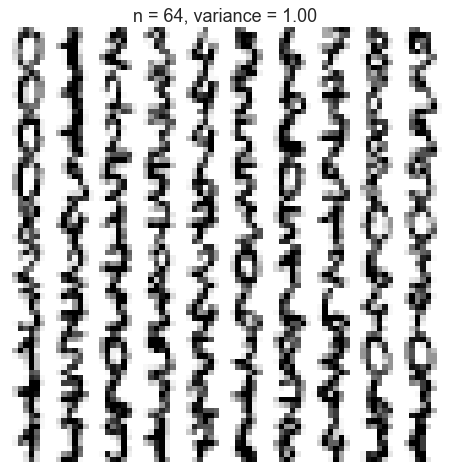

In [67]:
from IPython.html.widgets import interact
#透過這個互動式介面，可以看到降到一維根本辨識不了，32維幾乎就可以辨識大部分了，variance幾乎跟64維差不多
def plot_digits(n_components):
    fig = plt.figure(figsize=(8, 8))
    plt.subplot(1, 1, 1, frameon=False, xticks=[], yticks=[])
    nside = 10
    
    pca = PCA(n_components).fit(X)
    Xproj = pca.inverse_transform(pca.transform(X[:nside ** 2]))
    Xproj = np.reshape(Xproj, (nside, nside, 8, 8))
    total_var = pca.explained_variance_ratio_.sum()
    
    im = np.vstack([np.hstack([Xproj[i, j] for j in range(nside)])
                    for i in range(nside)])
    plt.imshow(im)
    plt.grid(False)
    plt.title("n = {0}, variance = {1:.2f}".format(n_components, total_var),
                 size=18)
    plt.clim(0, 16)
    
interact(plot_digits, n_components=[1, 32,64], nside=[1, 8]);